In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
dataset=pd.read_csv("D:\Study\DataScience\DataSets\data_stocks.csv")

In [90]:
dataset.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [91]:
dataset.tail()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
41261,1504209360,2472.22,44.72,164.11,155.090,83.67,106.565,114.49,47.150,142.425,...,99.675,99.53,49.485,40.955,76.360,32.285,62.110,76.88,114.31,62.7250
41262,1504209420,2471.77,44.73,164.12,155.160,83.65,106.590,114.52,47.150,142.450,...,99.730,99.63,49.480,40.960,76.370,32.295,62.100,76.90,114.33,62.7100
41263,1504209480,2470.03,44.74,164.01,155.065,83.62,106.520,114.47,47.150,142.330,...,99.735,99.64,49.495,40.940,76.315,32.290,62.090,76.88,114.31,62.6850
41264,1504209540,2471.49,44.71,163.88,154.960,83.58,106.400,114.33,47.135,142.170,...,99.700,99.63,49.485,40.925,76.300,32.275,62.075,76.83,114.23,62.6301
41265,1504209600,2471.49,44.74,163.98,155.160,83.69,106.470,114.46,47.150,142.410,...,99.670,99.64,49.490,40.940,76.320,32.270,62.070,76.81,114.28,62.6800


In [92]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: float64(501), int64(1)
memory usage: 158.0 MB


In [93]:
dataset.shape

(41266, 502)

In [94]:
dataset.get_dtype_counts()

float64    501
int64        1
dtype: int64

In [95]:
# Check if there are any null values. Since there are many columns, total sum of rows or elements which are null 
# across all columns tells us whether we need to consider to impute or remove those rows
dataset.isna().sum().sum()

0

In [96]:
# Check if there are any 0 values. Since there are many columns, total sum of rows or elements which have '0' values 
# across all columns tells us whether we need to consider to impute or clean/correct the data in those rows or elements
dataset[dataset==0].any().sum()

0

In [97]:
# Check if there are any -ve values. Since there are many columns, total sum of rows or elements which have '-ve' values 
# across all columns tells us whether we need to consider to impute or clean/correct the data in those rows or elements
dataset[dataset<0].any().sum()

0

In [98]:
dataset.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [99]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'],unit='s')

In [100]:
dataset.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [101]:
stock_data=dataset.copy()

In [102]:
# Create DF_list1 -> Dictionary which contains all the stocks data items with the Closing values
DF_list = {}
DF_list1 = {}
df2 = pd.DataFrame()
for column in stock_data.columns[1:]:
    try :
        df_col = column.split('.')[1]
        #print(df_col)
    except :
        df_col = column        
        
    Open = stock_data.groupby([stock_data['DATE'].dt.date])[column].first()
    Low = stock_data.groupby([stock_data['DATE'].dt.date])[column].min()
    High = stock_data.groupby([stock_data['DATE'].dt.date])[column].max()
    Close = stock_data.groupby([stock_data['DATE'].dt.date])[column].last()
        
    df = pd.DataFrame([Open,Close,Low,High])
    #df1 = pd.concat([df1,Close])
    df1 = pd.DataFrame([Close])
    
    df = df.transpose()
    df1 = df1.transpose()
    
    df.columns = ['Open','Low','High','Close']
    df1.columns = [df_col]
    
    DF_list[df_col] = df
    DF_list1[df_col] = df1

In [103]:
# Create a DataFrame df5 (Merge all the stock data present in the dictionary DF_list1)
df5 = DF_list1['AAL'].reset_index()
for item in DF_list1.keys():
   
    df5 = pd.merge(df5,DF_list1[item].reset_index())
#StockPriceData = df5.drop('DATE', axis=1)
#StockPriceData.index = pd.to_datetime(StockPriceData.index)
df5.head()


,DATE,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
0,2017-04-03,42.48,2358.9600,143.700,129.62,81.22,101.27,85.39,58.10,119.28,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
1,2017-04-04,40.90,2359.9600,144.770,130.04,81.24,101.45,84.95,59.30,118.30,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2,2017-04-05,41.31,2352.8401,144.020,129.89,80.04,101.93,83.54,58.80,116.21,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
3,2017-04-06,41.72,2357.6699,143.685,130.15,80.32,101.75,84.07,58.73,115.49,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
4,2017-04-07,41.81,2355.6899,143.340,130.22,80.01,102.19,84.79,58.10,115.62,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


In [104]:
df5['DATE'] = pd.to_datetime(df5['DATE'])

In [105]:
df5.set_index('DATE',inplace=True)
StockPriceData=df5

In [106]:
StockPriceData.index

DatetimeIndex(['2017-04-03', '2017-04-04', '2017-04-05', '2017-04-06',
               '2017-04-07', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-17',
               ...
               '2017-08-18', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', name='DATE', length=106, freq=None)

In [107]:
StockPriceData.head()

,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,42.48,2358.9600,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,40.90,2359.9600,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,41.31,2352.8401,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,41.72,2357.6699,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,41.81,2355.6899,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


In [108]:
#take the apple price and forecase
stockAPPL=pd.DataFrame(StockPriceData.AAPL)

In [109]:
stockAPPL.head()

,AAPL
DATE,
2017-04-03,143.700
2017-04-04,144.770
2017-04-05,144.020
2017-04-06,143.685
2017-04-07,143.340


In [110]:
stockAPPL.tail()

,AAPL
DATE,
2017-08-25,159.86
2017-08-28,161.47
2017-08-29,162.97
2017-08-30,163.35
2017-08-31,163.98


In [111]:
stockAPPL.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AAPL,106.0,150.372602,6.271409,140.68,144.5975,150.065,155.2375,163.98


In [112]:
#Creating a column 'AAPL_LOG' with the log values of 'NASDAQ.AAPL' column data
stockAPPL["AAPL_LOG"] =stockAPPL['AAPL'].apply(lambda x:np.log(x)) 

In [113]:
StockPriceAPPL=stockAPPL.drop('AAPL',axis=1)

In [114]:
StockPriceAPPL["AAPL_LOG"]

DATE
2017-04-03    4.967728
2017-04-04    4.975146
2017-04-05    4.969952
2017-04-06    4.967623
2017-04-07    4.965219
2017-04-10    4.963823
2017-04-11    4.953218
2017-04-12    4.954418
2017-04-13    4.949114
2017-04-17    4.954418
2017-04-18    4.950177
2017-04-19    4.946488
2017-04-20    4.958921
2017-04-21    4.957656
2017-04-24    4.967171
2017-04-25    4.973556
2017-04-26    4.967589
2017-04-27    4.968354
2017-04-28    4.967380
2017-05-01    4.987503
2017-05-02    4.993625
2017-05-03    4.990841
2017-05-04    4.987230
2017-05-05    5.003616
2017-05-08    5.030438
2017-05-09    5.036758
2017-05-10    5.032136
2017-05-11    5.036628
2017-05-12    5.050497
2017-05-15    5.047610
                ...   
2017-07-21    5.012434
2017-07-24    5.024472
2017-07-25    5.028737
2017-07-26    5.033440
2017-07-27    5.014362
2017-07-28    5.007296
2017-07-31    5.002133
2017-08-01    5.010969
2017-08-02    5.057137
2017-08-03    5.047096
2017-08-04    5.052353
2017-08-07    5.067709
2017-0

#### stock data set contain the stock price data between 2017-04-03 to 2017-08-31


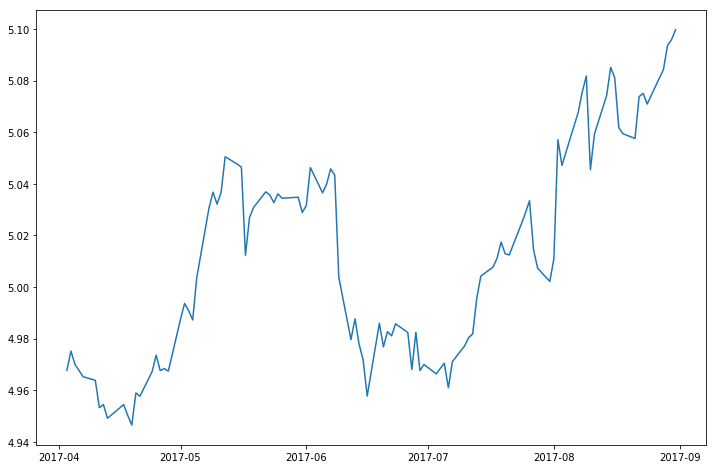

In [115]:
#plot stock AAL
plt.figure(figsize=(12,8))
#plt.style.use('fivethirtyeight')
plt.plot(StockPriceAPPL["AAPL_LOG"])


#### Plotting Rolling Statistics and check for stationarity :
#### The function will plot the moving mean or moving Standard Deviation. This is still visual method
#### NOTE: moving mean and moving standard deviation — At any instant ‘t’, we take the mean/std of the last year which in this case is 12 months)


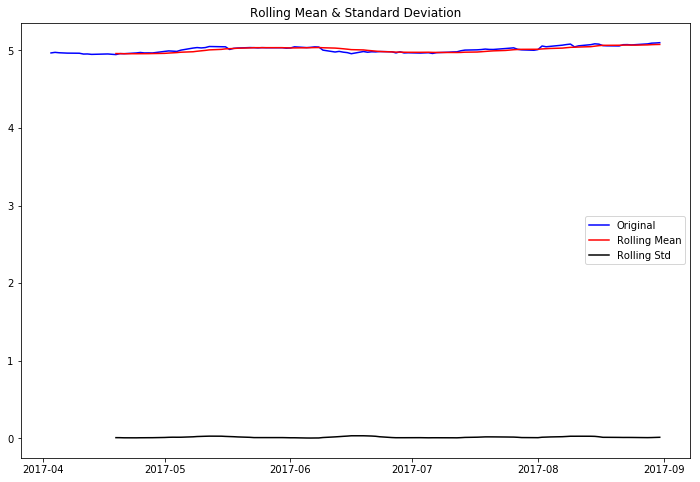

In [116]:
rolmean = StockPriceAPPL.rolling(12).mean()
rolstd = StockPriceAPPL.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( StockPriceAPPL, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()


In [117]:
from statsmodels.tsa.stattools import adfuller
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [118]:
adf_check(StockPriceAPPL["AAPL_LOG"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.8416914217030158
p-value : 0.806567826704039
#Lags Used : 6
Number of Observations Used : 99
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [119]:
stockAPPL['AAPL First Diff'] = StockPriceAPPL["AAPL_LOG"] - StockPriceAPPL["AAPL_LOG"].shift(1)

In [120]:
stockAPPL['AAPL First Diff'].head()

DATE
2017-04-03         NaN
2017-04-04    0.007418
2017-04-05   -0.005194
2017-04-06   -0.002329
2017-04-07   -0.002404
Name: AAPL First Diff, dtype: float64

In [121]:
adf_check(stockAPPL['AAPL First Diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.45373318070998
p-value : 0.00023816449471607439
#Lags Used : 5
Number of Observations Used : 99
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


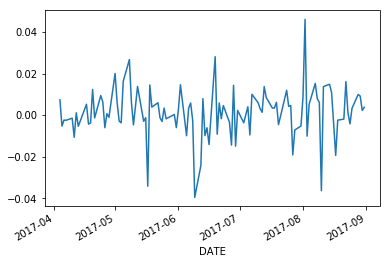

In [122]:
stockAPPL['AAPL First Diff'].plot()

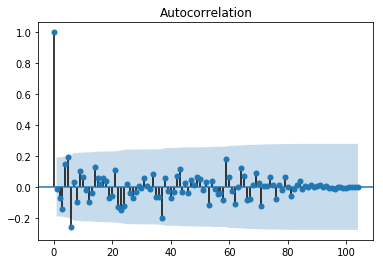

In [123]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig_first = plot_acf(stockAPPL['AAPL First Diff'].dropna())

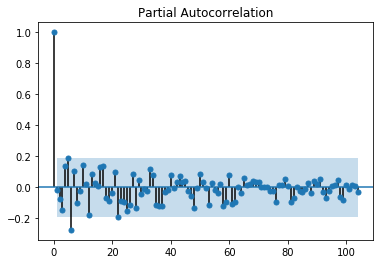

In [124]:
result = plot_pacf(stockAPPL['AAPL First Diff'].dropna())

In [125]:
from statsmodels.tsa.arima_model import ARIMA

In [126]:
model_arima = ARIMA(StockPriceAPPL["AAPL_LOG"],order=(5,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-634.1997021156949


In [127]:
import warnings
warnings.filterwarnings('ignore')
ararray =stockAPPL['AAPL_LOG'].values
pdq=[]
aic=[]
d=1
for p in range(6):
    for q in range(4):
        
        try:
            model = ARIMA(ararray,order=(p,d,q)) 
            arima_results = model.fit()
            aic.append(arima_results.aic)
            pdq.append((p,d,q))
            print((p,d,q),arima_results.aic)
        except:
            continue
keys = pdq
values = aic

d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))  

(0, 1, 0) -628.6576453107448
(0, 1, 1) -626.6829727220231
(0, 1, 2) -625.2223108837425
(0, 1, 3) -628.2007750553805
(1, 1, 0) -626.6790832023831
(2, 1, 0) -625.2638292075284
(2, 1, 1) -623.6929093403853
(3, 1, 0) -625.4924854024525
(3, 1, 1) -623.9642445007045
(3, 1, 2) -633.525918839091
(4, 1, 0) -625.5004249070396
(4, 1, 1) -624.3098580420052
(4, 1, 2) -625.2501641306924
(4, 1, 3) -630.7028214255826
(5, 1, 0) -627.118974009587
(5, 1, 1) -632.4335587967435
(5, 1, 2) -634.1997021156949
(5, 1, 3) -632.3138192417715
Best Model is : (5, 1, 2)


In [128]:
model_arima_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 -610.3141 
Dependent Variable: D.AAPL_LOG       Log-Likelihood:      326.10    
Date:               2018-12-05 06:51 Scale:               1.0000    
No. Observations:   105              Method:              css-mle   
Df Model:           8                Sample:              04-04-2017
Df Residuals:       97                                    08-31-2017
Converged:          0.0000           S.D. of innovations: 0.011     
AIC:                -634.1997        HQIC:                -624.521  
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                 0.0013   0.0011  1.1747 0.2430 -0.0009  0.0034
ar.L1.D.AAPL_LOG     -0.9302   0.1732 -5.3722 0.0000 -1.2696 -0.5909
ar.L2.D.AAPL_LOG     -0.6032   0.1986 -3.0373 0.0031 -0.9925 -0.2140
ar.L3.D.AAPL_LOG     -0.2006   0.1426 -1.4065 0.1628 -0.4800  0.0789
ar.L4.D.AAPL_LOG     -0.0247   0.1487 -0.1662 0.8683 -0.3161  0.2667
ar.L5.D.AAPL_LOG      0.2149   0.1145  1.8768 0.0635 -0.0095  0.4394
ma.L1.D.AAPL_LOG      0.9967   0.1629  6.1192 0.0000  0.6775  1.3160
ma.L2.D.AAPL_LOG      0.6629   0.1647  4.0254 0.0001  0.3401  0.9856
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -0.9772            -0.6330           1.1643            -0.4085
AR.2           -0.9772             0.6330           1.1643             0.4085
AR.3            0.0170            -1.2985           1.2986            -0.2479
AR.4            0.0170             1.2985           1.2986             0.2479
AR.5            2.0354            -0.0000           2.0354            -0.0000
MA.1           -0.7518            -0.9713           1.2282            -0.3548
MA.2           -0.7518             0.9713           1.2282             0.3548
====================================================================

"""

In [129]:
StockPriceAPPL["AAPL_LOG"].shape

(106,)

In [130]:
model_arima_fit.forecast(10)

(array([5.10301932, 5.10445959, 5.10558515, 5.10670101, 5.10872461,
        5.10989464, 5.11092654, 5.11235239, 5.11364176, 5.11506434]),
 array([0.01078259, 0.01576404, 0.01949862, 0.02143499, 0.02404737,
        0.02728835, 0.02924072, 0.03130662, 0.03318073, 0.03515702]),
 array([[5.08188584, 5.1241528 ],
        [5.07356264, 5.13535654],
        [5.06736855, 5.14380175],
        [5.0646892 , 5.14871281],
        [5.06159263, 5.15585659],
        [5.05641046, 5.16337882],
        [5.05361578, 5.1682373 ],
        [5.05099254, 5.17371225],
        [5.04860873, 5.1786748 ],
        [5.04615785, 5.18397083]]))

In [131]:
help(model_arima_fit.forecast)

Help on method forecast in module statsmodels.tsa.arima_model:

forecast(steps=1, exog=None, alpha=0.05) method of statsmodels.tsa.arima_model.ARIMAResults instance
    Out-of-sample forecasts
    
    Parameters
    ----------
    steps : int
        The number of out of sample forecasts from the end of the
        sample.
    exog : array
        If the model is an ARIMAX, you must provide out of sample
        values for the exogenous variables. This should not include
        the constant.
    alpha : float
        The confidence intervals for the forecasts are (1 - alpha) %
    
    Returns
    -------
    forecast : array
        Array of out of sample forecasts
    stderr : array
        Array of the standard error of the forecasts.
    conf_int : array
        2d array of the confidence interval for the forecast
    
    Notes
    -----
    Prediction is done in the levels of the original endogenous variable.
    If you would like prediction of differences in levels use `predic

In [132]:
# The output generated has three arrays:
#1. forecast : array
    #    Array of out of sample forecasts
#2.    stderr : array
   #     Array of the standard error of the forecasts.
#3.    conf_int : array
   #     2d array of the confidence interval for the forecast

In [133]:
model_arima_fit.forecast(16)[0]

array([5.10301932, 5.10445959, 5.10558515, 5.10670101, 5.10872461,
       5.10989464, 5.11092654, 5.11235239, 5.11364176, 5.11506434,
       5.11618629, 5.11749549, 5.11887318, 5.12010187, 5.12142635,
       5.12266863])

### Now predict the ADP

In [173]:
#take the apple price and forecase
stockADP=pd.DataFrame(StockPriceData.ADP)

In [174]:
stockADP.head()

,ADP
DATE,
2017-04-03,101.27
2017-04-04,101.45
2017-04-05,101.93
2017-04-06,101.75
2017-04-07,102.19


In [175]:
stockADP.tail()

,ADP
DATE,
2017-08-25,104.59
2017-08-28,104.76
2017-08-29,105.13
2017-08-30,105.93
2017-08-31,106.47


In [176]:
stockADP.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ADP,106.0,103.468726,4.424074,96.46,101.31625,102.44,104.5875,118.91


In [177]:
#Creating a column 'ADP_LOG' with the log values of 'NASDAQ.ADP' column data
stockADP["ADP_LOG"] =stockADP['ADP'].apply(lambda x:np.log(x))

In [178]:
StockPriceADP=stockADP.drop('ADP',axis=1)


In [179]:
StockPriceADP["ADP_LOG"]

DATE
2017-04-03    4.617790
2017-04-04    4.619566
2017-04-05    4.624286
2017-04-06    4.622519
2017-04-07    4.626834
2017-04-10    4.626344
2017-04-11    4.625855
2017-04-12    4.624482
2017-04-13    4.617691
2017-04-17    4.623599
2017-04-18    4.624286
2017-04-19    4.625659
2017-04-20    4.635117
2017-04-21    4.631715
2017-04-24    4.645736
2017-04-25    4.654056
2017-04-26    4.652626
2017-04-27    4.655483
2017-04-28    4.649091
2017-05-01    4.644102
2017-05-02    4.644487
2017-05-03    4.579955
2017-05-04    4.596129
2017-05-05    4.598045
2017-05-08    4.571613
2017-05-09    4.575535
2017-05-10    4.570889
2017-05-11    4.569128
2017-05-12    4.576462
2017-05-15    4.589549
                ...   
2017-07-21    4.649952
2017-07-24    4.639958
2017-07-25    4.636475
2017-07-26    4.663250
2017-07-27    4.750395
2017-07-28    4.765417
2017-07-31    4.778367
2017-08-01    4.760292
2017-08-02    4.747104
2017-08-03    4.716443
2017-08-04    4.713038
2017-08-07    4.720016
2017-0

In [180]:
StockPriceADP["ADP_LOG"].head()

DATE
2017-04-03    4.617790
2017-04-04    4.619566
2017-04-05    4.624286
2017-04-06    4.622519
2017-04-07    4.626834
Name: ADP_LOG, dtype: float64

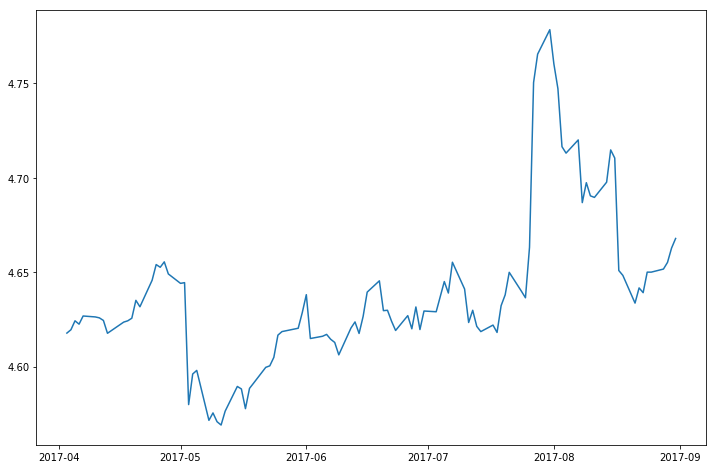

In [181]:
#plot stock AAL
plt.figure(figsize=(12,8))
#plt.style.use('fivethirtyeight')
plt.plot(StockPriceADP["ADP_LOG"])


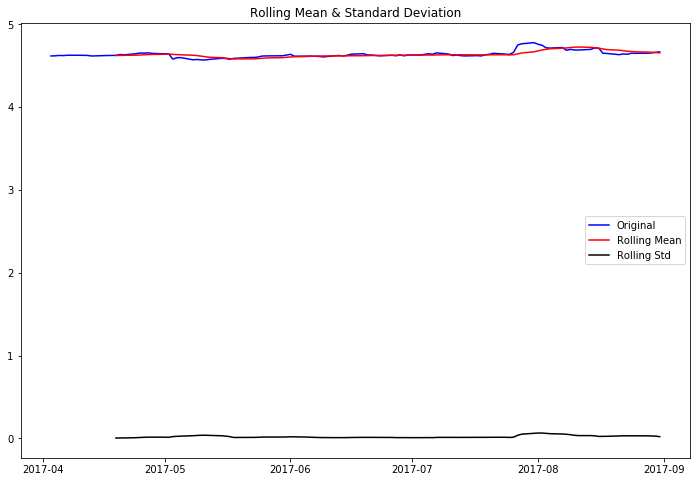

In [182]:
rolmean = StockPriceADP.rolling(12).mean()
rolstd = StockPriceADP.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( StockPriceADP, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [183]:

adf_check(StockPriceADP["ADP_LOG"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.9274461474815063
p-value : 0.31926175042941074
#Lags Used : 0
Number of Observations Used : 105
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [184]:
stockADP['ADP First Diff'] = StockPriceADP["ADP_LOG"] - StockPriceADP["ADP_LOG"].shift(1)


In [185]:

stockADP['ADP First Diff'].head()

DATE
2017-04-03         NaN
2017-04-04    0.001776
2017-04-05    0.004720
2017-04-06   -0.001767
2017-04-07    0.004315
Name: ADP First Diff, dtype: float64

In [186]:
adf_check(stockADP['ADP First Diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -9.357064875158601
p-value : 8.006428135800317e-16
#Lags Used : 0
Number of Observations Used : 104
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


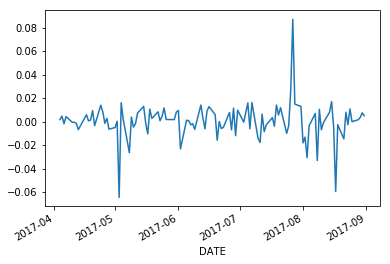

In [187]:
stockADP['ADP First Diff'].plot()

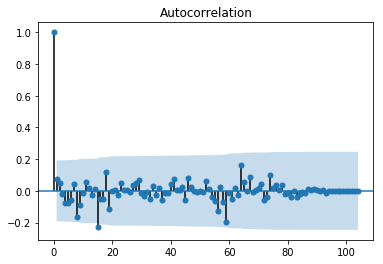

In [188]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig_first = plot_acf(stockADP['ADP First Diff'].dropna())

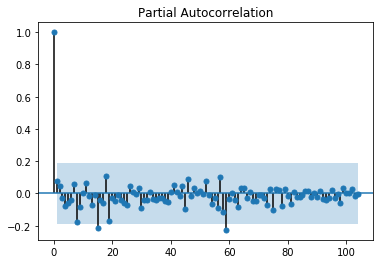

In [189]:
result = plot_pacf(stockADP['ADP First Diff'].dropna())

In [190]:
model_arima = ARIMA(StockPriceADP["ADP_LOG"],order=(5,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-560.4969429467492


In [192]:
model_arima_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 -536.6113 
Dependent Variable: D.ADP_LOG        Log-Likelihood:      289.25    
Date:               2018-12-05 07:15 Scale:               1.0000    
No. Observations:   105              Method:              css-mle   
Df Model:           8                Sample:              04-04-2017
Df Residuals:       97                                    08-31-2017
Converged:          0.0000           S.D. of innovations: 0.015     
AIC:                -560.4969        HQIC:                -550.818  
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             0.0004    0.0017   0.2429  0.8086  -0.0028   0.0036
ar.L1.D.ADP_LOG  -0.2682    0.1055  -2.5415  0.0126  -0.4750  -0.0614
ar.L2.D.ADP_LOG  -0.8625    0.1009  -8.5509  0.0000  -1.0602  -0.6648
ar.L3.D.ADP_LOG   0.0651    0.1299   0.5013  0.6173  -0.1895   0.3197
ar.L4.D.ADP_LOG   0.0459    0.1028   0.4464  0.6563  -0.1556   0.2474
ar.L5.D.ADP_LOG  -0.0854    0.0977  -0.8738  0.3844  -0.2769   0.1061
ma.L1.D.ADP_LOG   0.3552    0.0474   7.4928  0.0000   0.2623   0.4481
ma.L2.D.ADP_LOG   1.0000    0.0643  15.5411  0.0000   0.8739   1.1261
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -0.1967            -0.9856           1.0050            -0.2814
AR.2           -0.1967             0.9856           1.0050             0.2814
AR.3           -2.1728            -0.0000           2.1728            -0.5000
AR.4            1.5519            -1.7114           2.3102            -0.1328
AR.5            1.5519             1.7114           2.3102             0.1328
MA.1           -0.1776            -0.9841           1.0000            -0.2784
MA.2           -0.1776             0.9841           1.0000             0.2784
====================================================================

"""

In [195]:
model_arima_fit.forecast(16)[0]

array([4.66478713, 4.66749005, 4.67064288, 4.66769862, 4.66621621,
       4.67059159, 4.6712656 , 4.66765693, 4.6693581 , 4.67323209,
       4.67099498, 4.66898784, 4.67294048, 4.67434508, 4.67084182,
       4.67177262])

In [197]:
#take the CBOE price and forecase
stockCBOE=pd.DataFrame(StockPriceData.CBOE)

In [198]:
stockCBOE.head()

,CBOE
DATE,
2017-04-03,80.67
2017-04-04,80.89
2017-04-05,80.42
2017-04-06,80.32
2017-04-07,81.08


In [199]:
stockCBOE.tail()

,CBOE
DATE,
2017-08-25,99.77
2017-08-28,100.15
2017-08-29,100.34
2017-08-30,100.27
2017-08-31,100.89


In [200]:
stockCBOE.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CBOE,106.0,89.398774,5.757677,80.32,84.1525,89.58,93.4975,100.89


In [201]:
#Creating a column 'CBOE_LOG' with the log values of 'NASDAQ.CBOE' column data
stockCBOE["CBOE_LOG"] =stockCBOE['CBOE'].apply(lambda x:np.log(x))

In [202]:
StockPriceCBOE=stockCBOE.drop('CBOE',axis=1)

In [203]:
StockPriceCBOE["CBOE_LOG"]

DATE
2017-04-03    4.390367
2017-04-04    4.393090
2017-04-05    4.387263
2017-04-06    4.386019
2017-04-07    4.395436
2017-04-10    4.395806
2017-04-11    4.389375
2017-04-12    4.400971
2017-04-13    4.398023
2017-04-17    4.408669
2017-04-18    4.405865
2017-04-19    4.409399
2017-04-20    4.418841
2017-04-21    4.418720
2017-04-24    4.428910
2017-04-25    4.432720
2017-04-26    4.426402
2017-04-27    4.411585
2017-04-28    4.411707
2017-05-01    4.414736
2017-05-02    4.418600
2017-05-03    4.419202
2017-05-04    4.418600
2017-05-05    4.427956
2017-05-08    4.409885
2017-05-09    4.442534
2017-05-10    4.440767
2017-05-11    4.435093
2017-05-12    4.431650
2017-05-15    4.442651
                ...   
2017-07-21    4.542656
2017-07-24    4.541698
2017-07-25    4.536891
2017-07-26    4.543720
2017-07-27    4.535713
2017-07-28    4.537854
2017-07-31    4.548917
2017-08-01    4.556085
2017-08-02    4.551664
2017-08-03    4.553772
2017-08-04    4.537961
2017-08-07    4.550080
2017-0

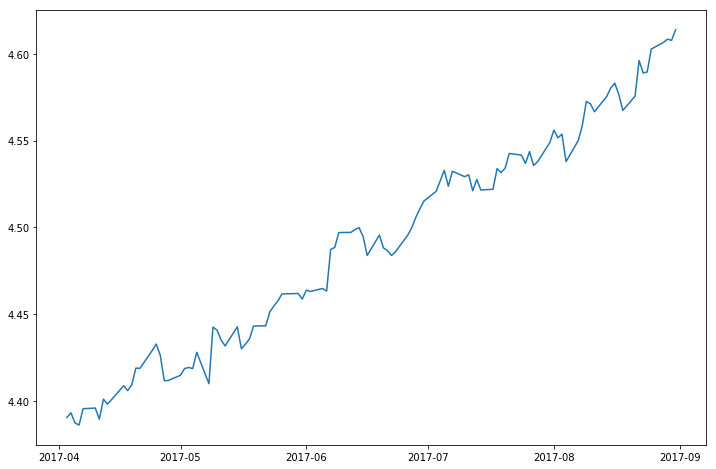

In [204]:
#plot stock AAL
plt.figure(figsize=(12,8))
#plt.style.use('fivethirtyeight')
plt.plot(StockPriceCBOE["CBOE_LOG"])

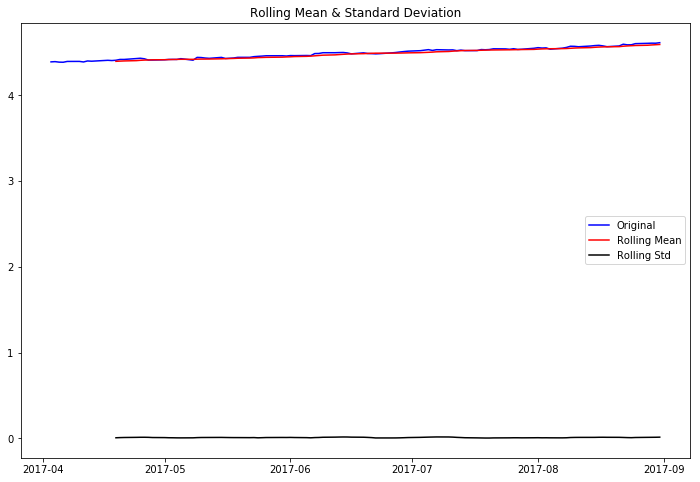

In [205]:
rolmean = StockPriceCBOE.rolling(12).mean()
rolstd = StockPriceCBOE.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( StockPriceCBOE, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [206]:
adf_check(StockPriceCBOE["CBOE_LOG"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.15119520835472883
p-value : 0.969387539657401
#Lags Used : 1
Number of Observations Used : 104
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [207]:
stockCBOE['CBOE First Diff'] = StockPriceCBOE["CBOE_LOG"] - StockPriceCBOE["CBOE_LOG"].shift(1)

In [208]:
stockCBOE['CBOE First Diff'].head()

DATE
2017-04-03         NaN
2017-04-04    0.002723
2017-04-05   -0.005827
2017-04-06   -0.001244
2017-04-07    0.009418
Name: CBOE First Diff, dtype: float64

In [209]:
adf_check(stockCBOE['CBOE First Diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -13.24572391243465
p-value : 8.982796302540516e-25
#Lags Used : 0
Number of Observations Used : 104
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


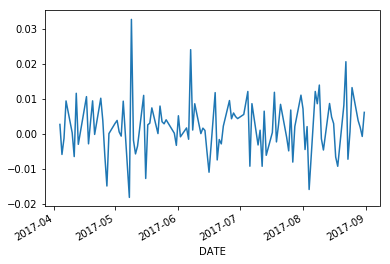

In [210]:
stockCBOE['CBOE First Diff'].plot()

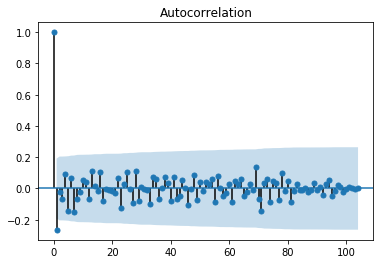

In [211]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig_first = plot_acf(stockCBOE['CBOE First Diff'].dropna())

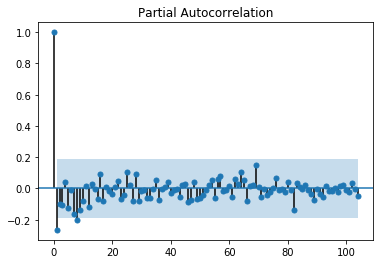

In [212]:
result = plot_pacf(stockCBOE['CBOE First Diff'].dropna())

In [213]:
model_arima = ARIMA(StockPriceCBOE["CBOE_LOG"],order=(5,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-724.272407175783


In [215]:
model_arima_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 -700.3868 
Dependent Variable: D.CBOE_LOG       Log-Likelihood:      371.14    
Date:               2018-12-05 07:28 Scale:               1.0000    
No. Observations:   105              Method:              css-mle   
Df Model:           8                Sample:              04-04-2017
Df Residuals:       97                                    08-31-2017
Converged:          0.0000           S.D. of innovations: 0.007     
AIC:                -724.2724        HQIC:                -714.593  
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                 0.0021   0.0000 42.4355 0.0000  0.0020  0.0022
ar.L1.D.CBOE_LOG      0.8597   0.4917  1.7483 0.0836 -0.1041  1.8235
ar.L2.D.CBOE_LOG     -0.0533   0.3041 -0.1751 0.8613 -0.6493  0.5428
ar.L3.D.CBOE_LOG     -0.0396   0.1408 -0.2812 0.7792 -0.3156  0.2364
ar.L4.D.CBOE_LOG      0.0847   0.1265  0.6700 0.5044 -0.1631  0.3326
ar.L5.D.CBOE_LOG     -0.1693   0.1034 -1.6371 0.1049 -0.3720  0.0334
ma.L1.D.CBOE_LOG     -1.3016   0.5022 -2.5917 0.0110 -2.2859 -0.3172
ma.L2.D.CBOE_LOG      0.3016   0.5013  0.6015 0.5489 -0.6810  1.2841
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            1.1343            -0.4217           1.2102            -0.0566
AR.2            1.1343             0.4217           1.2102             0.0566
AR.3           -0.0825            -1.5841           1.5862            -0.2583
AR.4           -0.0825             1.5841           1.5862             0.2583
AR.5           -1.6031            -0.0000           1.6031            -0.5000
MA.1            1.0000             0.0000           1.0000             0.0000
MA.2            3.3161             0.0000           3.3161             0.0000
====================================================================

"""

In [216]:
model_arima_fit.forecast(16)[0]

array([4.61020629, 4.6087557 , 4.60774508, 4.60840224, 4.60836764,
       4.60952422, 4.61131105, 4.6136705 , 4.61610055, 4.61875386,
       4.62142445, 4.62403703, 4.62649902, 4.62884094, 4.63105361,
       4.63315968])

In [217]:
#take the CSCO price and forecase
stockCSCO=pd.DataFrame(StockPriceData.CSCO)

In [218]:
stockCSCO.head()

,CSCO
DATE,
2017-04-03,33.580
2017-04-04,33.410
2017-04-05,33.000
2017-04-06,33.075
2017-04-07,32.960


In [219]:
stockCSCO.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CSCO,106.0,32.129151,0.993225,30.37,31.4825,31.78,32.7825,34.39


In [220]:
#Creating a column 'CSCO_LOG' with the log values of 'NASDAQ.CSCO' column data
stockCSCO["CSCO_LOG"] =stockCSCO['CSCO'].apply(lambda x:np.log(x))

In [221]:
StockPriceCSCO=stockCSCO.drop('CSCO',axis=1)

In [222]:
StockPriceCSCO["CSCO_LOG"]

DATE
2017-04-03    3.513931
2017-04-04    3.508855
2017-04-05    3.496508
2017-04-06    3.498778
2017-04-07    3.495295
2017-04-10    3.497113
2017-04-11    3.494080
2017-04-12    3.484926
2017-04-13    3.478776
2017-04-17    3.484619
2017-04-18    3.486457
2017-04-19    3.485845
2017-04-20    3.491343
2017-04-21    3.491038
2017-04-24    3.504957
2017-04-25    3.509155
2017-04-26    3.508556
2017-04-27    3.518980
2017-04-28    3.528124
2017-05-01    3.525478
2017-05-02    3.533102
2017-05-03    3.533687
2017-05-04    3.531641
2017-05-05    3.537766
2017-05-08    3.534854
2017-05-09    3.523415
2017-05-10    3.518684
2017-05-11    3.515419
2017-05-12    3.509902
2017-05-15    3.533102
                ...   
2017-07-21    3.460723
2017-07-24    3.461351
2017-07-25    3.469479
2017-07-26    3.455054
2017-07-27    3.452207
2017-07-28    3.450622
2017-07-31    3.448399
2017-08-01    3.454738
2017-08-02    3.450622
2017-08-03    3.451890
2017-08-04    3.459466
2017-08-07    3.460723
2017-0

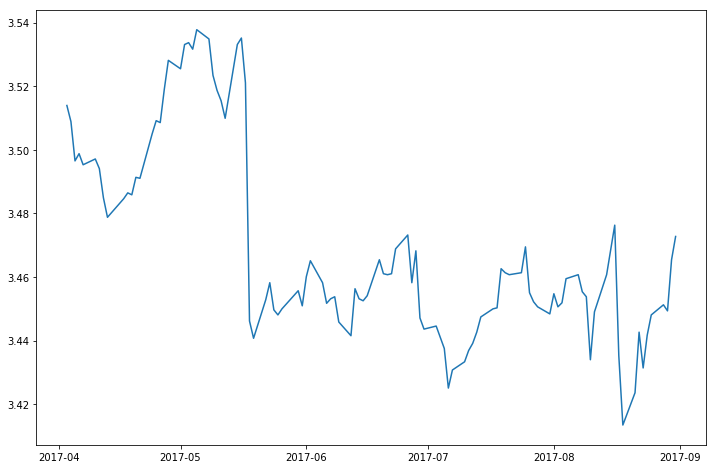

In [223]:
#plot stock AAL
plt.figure(figsize=(12,8))
#plt.style.use('fivethirtyeight')
plt.plot(StockPriceCSCO["CSCO_LOG"])

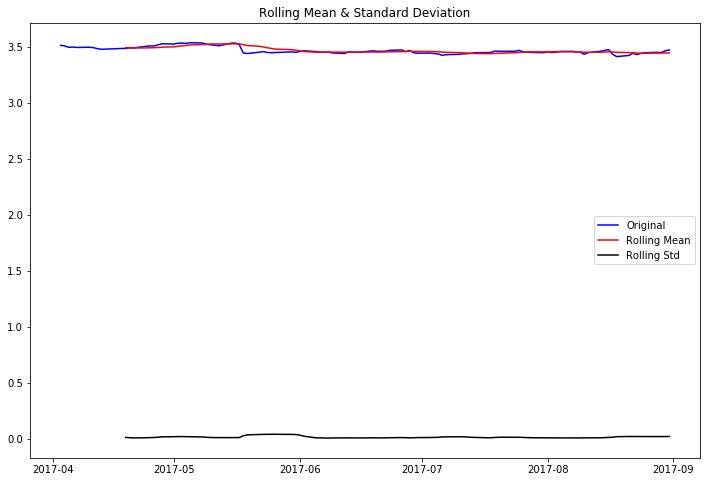

In [224]:
rolmean = StockPriceCSCO.rolling(12).mean()
rolstd = StockPriceCSCO.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( StockPriceCSCO, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [225]:
adf_check(StockPriceCSCO["CSCO_LOG"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.9692074933468409
p-value : 0.30023555675882463
#Lags Used : 2
Number of Observations Used : 103
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [226]:
stockCSCO['CSCO First Diff'] = StockPriceCSCO["CSCO_LOG"] - StockPriceCSCO["CSCO_LOG"].shift(1)

In [227]:
stockCSCO['CSCO First Diff'].head()

DATE
2017-04-03         NaN
2017-04-04   -0.005075
2017-04-05   -0.012348
2017-04-06    0.002270
2017-04-07   -0.003483
Name: CSCO First Diff, dtype: float64

In [228]:
adf_check(stockCSCO['CSCO First Diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -7.237362416810143
p-value : 1.9239138164285327e-10
#Lags Used : 2
Number of Observations Used : 102
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


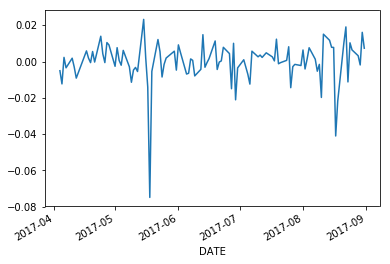

In [229]:
stockCSCO['CSCO First Diff'].plot()

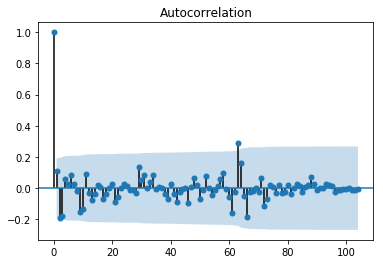

In [230]:
fig_first = plot_acf(stockCSCO['CSCO First Diff'].dropna())

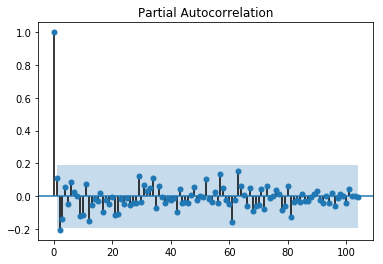

In [231]:
result = plot_pacf(stockCSCO['CSCO First Diff'].dropna())

In [232]:
model_arima = ARIMA(StockPriceCSCO["CSCO_LOG"],order=(5,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-633.1126858067161


In [233]:
model_arima_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 -609.2270 
Dependent Variable: D.CSCO_LOG       Log-Likelihood:      325.56    
Date:               2018-12-05 08:10 Scale:               1.0000    
No. Observations:   105              Method:              css-mle   
Df Model:           8                Sample:              04-04-2017
Df Residuals:       97                                    08-31-2017
Converged:          0.0000           S.D. of innovations: 0.011     
AIC:                -633.1127        HQIC:                -623.434  
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const               -0.0004   0.0009  -0.4434 0.6585 -0.0022  0.0014
ar.L1.D.CSCO_LOG    -1.6318   0.1000 -16.3167 0.0000 -1.8279 -1.4358
ar.L2.D.CSCO_LOG    -0.8992   0.1853  -4.8541 0.0000 -1.2623 -0.5362
ar.L3.D.CSCO_LOG    -0.3787   0.2018  -1.8766 0.0636 -0.7742  0.0168
ar.L4.D.CSCO_LOG    -0.3436   0.1853  -1.8544 0.0667 -0.7067  0.0196
ar.L5.D.CSCO_LOG    -0.0596   0.1014  -0.5878 0.5580 -0.2582  0.1391
ma.L1.D.CSCO_LOG     1.8275   0.0423  43.2293 0.0000  1.7446  1.9103
ma.L2.D.CSCO_LOG     1.0000   0.0404  24.7775 0.0000  0.9209  1.0791
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -0.9798            -0.3780           1.0502            -0.4414
AR.2           -0.9798             0.3780           1.0502             0.4414
AR.3            0.5433            -1.6778           1.7635            -0.2002
AR.4            0.5433             1.6778           1.7635             0.2002
AR.5           -4.8938            -0.0000           4.8938            -0.5000
MA.1           -0.9137            -0.4063           1.0000            -0.4334
MA.2           -0.9137             0.4063           1.0000             0.4334
====================================================================

"""

In [234]:
model_arima_fit.forecast(16)[0]

array([3.47007531, 3.46622409, 3.46494831, 3.46625219, 3.46543135,
       3.46578444, 3.46434129, 3.46453855, 3.46380593, 3.46351907,
       3.46326698, 3.46245285, 3.46257757, 3.46156473, 3.46173828,
       3.46083427])

In [235]:
#take the EBAY price and forecase
stockEBAY=pd.DataFrame(StockPriceData.EBAY)

In [236]:
stockEBAY.head()

,EBAY
DATE,
2017-04-03,33.76
2017-04-04,34.14
2017-04-05,33.81
2017-04-06,34.16
2017-04-07,33.91


In [237]:
stockEBAY.tail()

,EBAY
DATE,
2017-08-25,34.68
2017-08-28,34.81
2017-08-29,35.20
2017-08-30,35.69
2017-08-31,36.13


In [238]:
stockEBAY.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EBAY,106.0,34.791981,1.102618,32.05,34.0375,34.81,35.53,37.18


In [239]:
#Creating a column 'EBAY_LOG' with the log values of 'NASDAQ.EBAY' column data
stockEBAY["EBAY_LOG"] =stockEBAY['EBAY'].apply(lambda x:np.log(x))

In [240]:
StockPriceEBAY=stockEBAY.drop('EBAY',axis=1)

In [241]:
StockPriceEBAY["EBAY_LOG"]

DATE
2017-04-03    3.519277
2017-04-04    3.530470
2017-04-05    3.520757
2017-04-06    3.531055
2017-04-07    3.523710
2017-04-10    3.528124
2017-04-11    3.526066
2017-04-12    3.533687
2017-04-13    3.536020
2017-04-17    3.539219
2017-04-18    3.526949
2017-04-19    3.522087
2017-04-20    3.482163
2017-04-21    3.471345
2017-04-24    3.467297
2017-04-25    3.490733
2017-04-26    3.496811
2017-04-27    3.498324
2017-04-28    3.508855
2017-05-01    3.505858
2017-05-02    3.511844
2017-05-03    3.504355
2017-05-04    3.511844
2017-05-05    3.511545
2017-05-08    3.503754
2017-05-09    3.518091
2017-05-10    3.522825
2017-05-11    3.529884
2017-05-12    3.528417
2017-05-15    3.531641
                ...   
2017-07-21    3.600321
2017-07-24    3.594019
2017-07-25    3.592369
2017-07-26    3.611998
2017-07-27    3.588230
2017-07-28    3.581851
2017-07-31    3.575991
2017-08-01    3.581016
2017-08-02    3.580737
2017-08-03    3.575431
2017-08-04    3.572907
2017-08-07    3.586570
2017-0

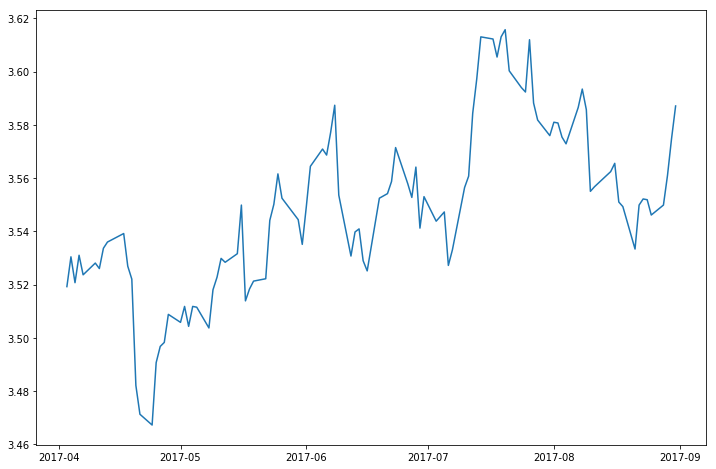

In [242]:
#plot stock AAL
plt.figure(figsize=(12,8))
#plt.style.use('fivethirtyeight')
plt.plot(StockPriceEBAY["EBAY_LOG"])

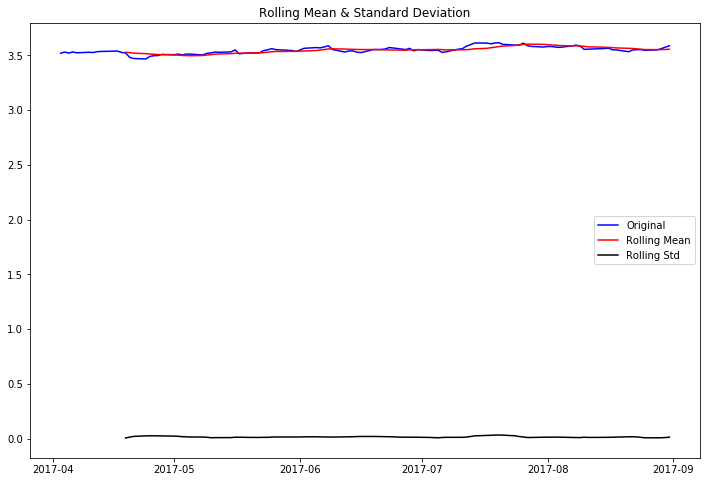

In [243]:
rolmean = StockPriceEBAY.rolling(12).mean()
rolstd = StockPriceEBAY.rolling(12).std()
plt.figure(figsize=(12,8)) 
plt.plot( StockPriceEBAY, color='blue',label='Original')
plt.plot(rolmean, color='red', label='Rolling Mean')
plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [244]:
adf_check(StockPriceEBAY["EBAY_LOG"])

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.9962978634802515
p-value : 0.2881987125649663
#Lags Used : 0
Number of Observations Used : 105
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [245]:
stockEBAY['EBAY First Diff'] = StockPriceEBAY["EBAY_LOG"] - StockPriceEBAY["EBAY_LOG"].shift(1)

In [246]:
stockEBAY['EBAY First Diff'].head()

DATE
2017-04-03         NaN
2017-04-04    0.011193
2017-04-05   -0.009713
2017-04-06    0.010299
2017-04-07   -0.007345
Name: EBAY First Diff, dtype: float64

In [247]:
adf_check(stockEBAY['EBAY First Diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -4.122273559572955
p-value : 0.0008895990751206726
#Lags Used : 6
Number of Observations Used : 98
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


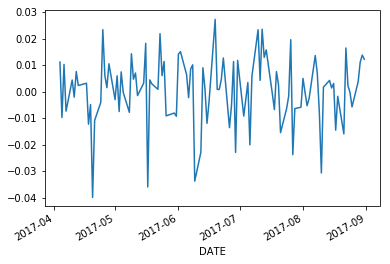

In [248]:
stockEBAY['EBAY First Diff'].plot()

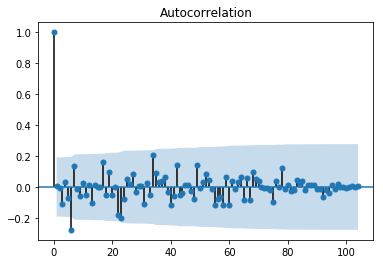

In [249]:
fig_first = plot_acf(stockEBAY['EBAY First Diff'].dropna())

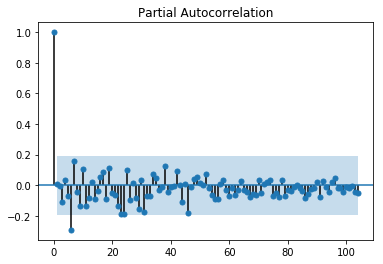

In [250]:
result = plot_pacf(stockEBAY['EBAY First Diff'].dropna())

In [251]:
model_arima = ARIMA(StockPriceEBAY["EBAY_LOG"],order=(5,1,2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

-608.4280752505076


In [252]:
model_arima_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 -584.5424 
Dependent Variable: D.EBAY_LOG       Log-Likelihood:      313.21    
Date:               2018-12-05 08:19 Scale:               1.0000    
No. Observations:   105              Method:              css-mle   
Df Model:           8                Sample:              04-04-2017
Df Residuals:       97                                    08-31-2017
Converged:          0.0000           S.D. of innovations: 0.012     
AIC:                -608.4281        HQIC:                -598.749  
--------------------------------------------------------------------
                      Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                 0.0006   0.0010  0.5725 0.5683 -0.0014  0.0025
ar.L1.D.EBAY_LOG      0.5072   0.6401  0.7923 0.4301 -0.7475  1.7618
ar.L2.D.EBAY_LOG     -0.4595   0.3077 -1.4935 0.1386 -1.0625  0.1435
ar.L3.D.EBAY_LOG     -0.1091   0.1160 -0.9401 0.3495 -0.3364  0.1183
ar.L4.D.EBAY_LOG      0.1188   0.1072  1.1087 0.2703 -0.0912  0.3289
ar.L5.D.EBAY_LOG     -0.2294   0.0950 -2.4144 0.0176 -0.4155 -0.0432
ma.L1.D.EBAY_LOG     -0.5006   0.6682 -0.7492 0.4555 -1.8103  0.8090
ma.L2.D.EBAY_LOG      0.4535   0.3073  1.4757 0.1433 -0.1488  1.0558
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            0.9765            -0.8882           1.3200            -0.1175
AR.2            0.9765             0.8882           1.3200             0.1175
AR.3            0.0390            -1.2854           1.2860            -0.2452
AR.4            0.0390             1.2854           1.2860             0.2452
AR.5           -1.5131            -0.0000           1.5131            -0.5000
MA.1            0.5520            -1.3786           1.4850            -0.1894
MA.2            0.5520             1.3786           1.4850             0.1894
====================================================================

"""

In [253]:
model_arima_fit.forecast(16)[0]

array([3.58867677, 3.58929288, 3.58729978, 3.58477875, 3.58238023,
       3.58291366, 3.58484028, 3.58664855, 3.58757252, 3.58827071,
       3.58876674, 3.58902682, 3.58920682, 3.58965268, 3.59032365,
       3.5910137 ])